In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy  as np 

## Read Data

In [2]:
data=pd.read_csv(r'C:\Users\Target\Machine Learning/Automobile_data.csv')


## know type of each columns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
data.replace('?',np.nan,inplace=True)

In [5]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Check null values

In [6]:
data.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

## Handle Missing Values

### Handle missing values in 'num-of-doors' feature

In [7]:
data['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [8]:
data['num-of-doors'].replace(np.nan,'four',inplace=True)

In [9]:
data[data['make']=='alfa-romero']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


### Handle missing values in 'normalized-losses' feature

In [10]:
data[data['make']=='alfa-romero'].loc[:,'normalized-losses']

0    NaN
1    NaN
2    NaN
Name: normalized-losses, dtype: object

In [11]:
str(data['normalized-losses'][0])=='nan'

True

In [12]:
index_list=[]

for i in range(len(data)):
    if str(data['normalized-losses'][i])=='nan':
        index_list.append(i)

In [13]:
index_list

[0,
 1,
 2,
 5,
 7,
 9,
 14,
 15,
 16,
 17,
 43,
 44,
 45,
 46,
 48,
 49,
 63,
 66,
 71,
 73,
 74,
 75,
 82,
 83,
 84,
 109,
 110,
 113,
 114,
 124,
 126,
 127,
 128,
 129,
 130,
 131,
 181,
 189,
 191,
 192,
 193]

In [14]:
normalized_mis_values=data.iloc[index_list,:]

In [15]:
normalized_mis_values.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920


In [16]:
normalized_mis_values['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'isuzu', 'jaguar', 'mazda',
       'mercedes-benz', 'mercury', 'mitsubishi', 'peugot', 'plymouth',
       'porsche', 'renault', 'toyota', 'volkswagen'], dtype=object)

In [17]:
brands=normalized_mis_values['make'].unique()

In [18]:
brand_normalized={}
for brand in brands:
    
    values=data[data['make']==brand].loc[:,'normalized-losses']
    brand_normalized[brand]=values.median()



C:\Users\Target\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Target\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Target\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Target\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [19]:
brand_normalized

{'alfa-romero': nan,
 'audi': 161.0,
 'bmw': 190.0,
 'isuzu': nan,
 'jaguar': 145.0,
 'mazda': 115.0,
 'mercedes-benz': 93.0,
 'mercury': nan,
 'mitsubishi': 153.0,
 'peugot': 161.0,
 'plymouth': 136.5,
 'porsche': 186.0,
 'renault': nan,
 'toyota': 91.0,
 'volkswagen': 94.0}

In [20]:
brand_normalized['bmw']

190.0

In [21]:
brand_normalized.keys()

dict_keys(['alfa-romero', 'audi', 'bmw', 'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'peugot', 'plymouth', 'porsche', 'renault', 'toyota', 'volkswagen'])

In [22]:
for i in range(len(data)):
    if data.loc[i,'make'] in brand_normalized.keys():
        if str(data.loc[i,'normalized-losses'])=='nan':
            data.loc[i,'normalized-losses']=brand_normalized[data.loc[i,'make']]

In [23]:
data.isna().sum()

symboling             0
normalized-losses    10
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [24]:
data['normalized-losses'].fillna(pd.to_numeric(data['normalized-losses']).mean(),inplace=True)

In [25]:
data.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

### Handle missing values in 'bore' feature

In [26]:
data[(data['bore']).isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645


In [27]:
mazda_bore=data[data['make']=='mazda']
mazda_bore_median=mazda_bore.loc[:,'bore'].median()

In [28]:
for i  in range(len(data)):
    if data.loc[i,'make']=='mazda':
        if str(data.loc[i,'bore'])=='nan':
            data.loc[i,'bore']=mazda_bore_median
    

### Handle missing values in 'stroke' feature

In [29]:
data[(data['stroke']).isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.39,NaN,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.39,NaN,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.39,NaN,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,3.39,NaN,9.4,135,6000,16,23,15645


In [30]:
mazda_stroke=data[data['make']=='mazda']
mazda_stroke_median=mazda_stroke.loc[:,'stroke'].median()

In [31]:
for i  in range(len(data)):
    if data.loc[i,'make']=='mazda':
        if str(data.loc[i,'stroke'])=='nan':
            data.loc[i,'stroke']=mazda_stroke_median
data.loc[:,'stroke']=pd.to_numeric(data.loc[:,'stroke'])
data.loc[:,'bore']=pd.to_numeric(data.loc[:,'bore'])

In [32]:
data.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

### Handle missing values in 'horsepower'and 'peak-rpm' features

In [33]:
data[(data['horsepower']).isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,125.64359,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295
131,2,125.64359,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895


In [34]:
data[(data['peak-rpm']).isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,125.64359,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295
131,2,125.64359,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895


In [35]:
data['peak-rpm'].fillna(pd.to_numeric(data['peak-rpm']).mean(),inplace=True)
data['horsepower'].fillna(pd.to_numeric(data['horsepower']).mean(),inplace=True)

In [36]:
data.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [37]:
data[data['price'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,161.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
44,1,125.64359,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
45,0,125.64359,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
129,1,186.0,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,NaN


In [38]:
data.dropna(inplace=True)
data.isna().sum()


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [40]:
data['normalized-losses']=pd.to_numeric(data['normalized-losses'])

In [41]:
data['price']=pd.to_numeric(data['price'])

## Linear Correlation

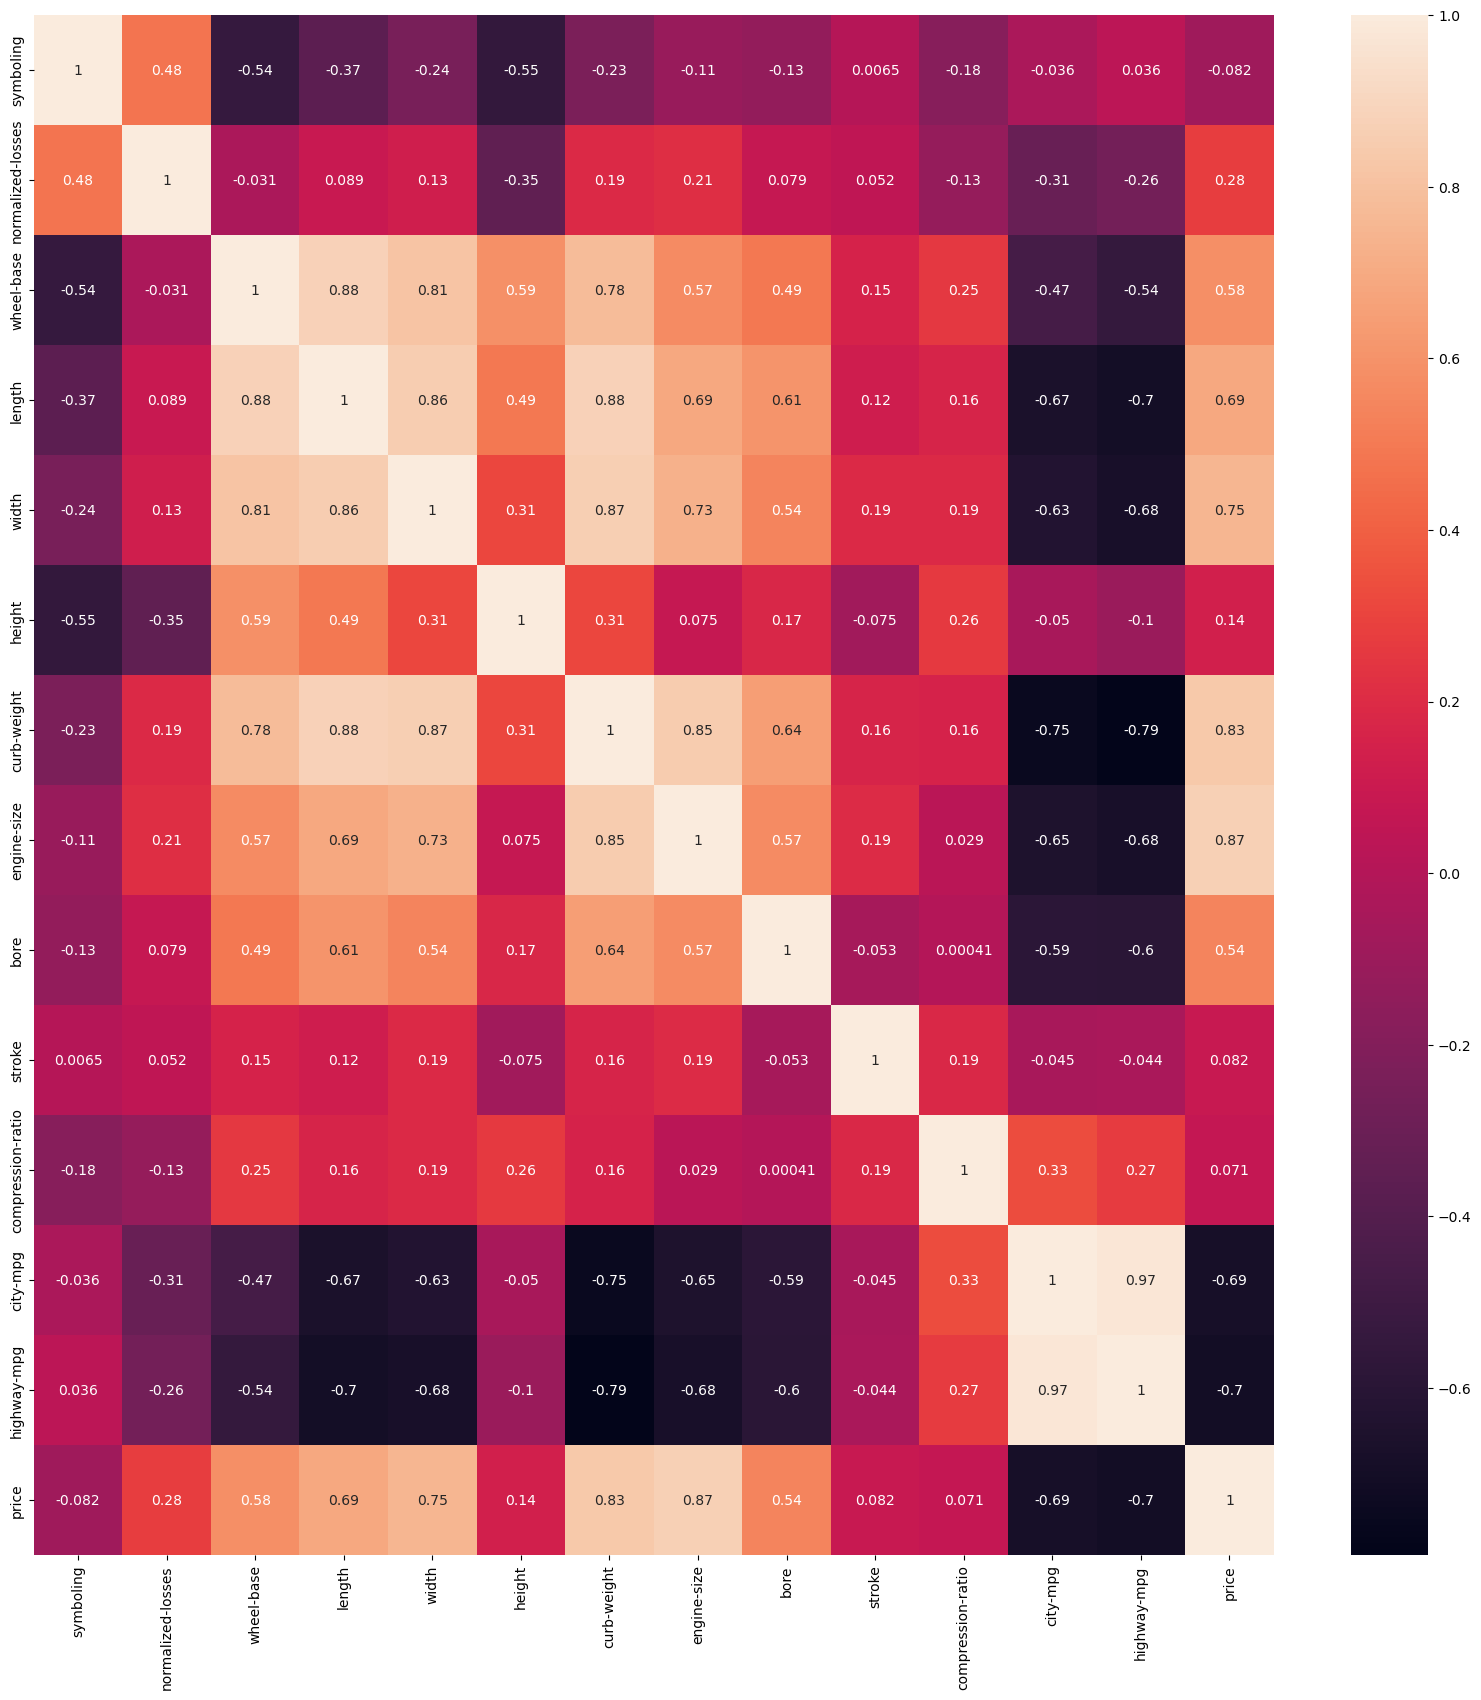

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

## Visualization 

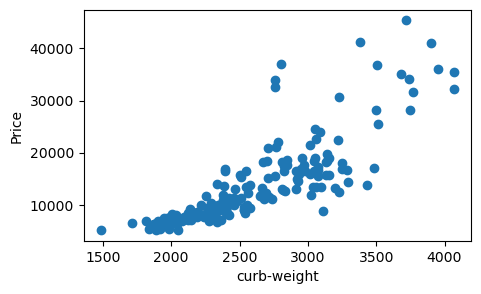

In [43]:
plt.figure(figsize=(5,3))
plt.scatter(data['curb-weight'],data['price'])
plt.xlabel('curb-weight')
plt.ylabel('Price')
plt.show()

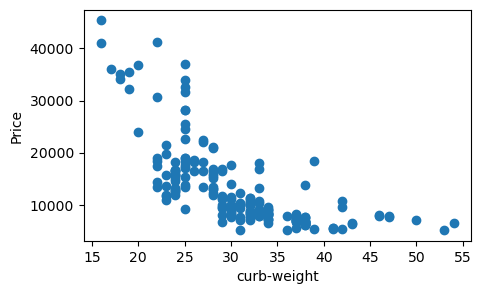

In [44]:
plt.figure(figsize=(5,3))
plt.scatter(data['highway-mpg'],data['price'])
plt.xlabel('curb-weight')
plt.ylabel('Price')
plt.show()

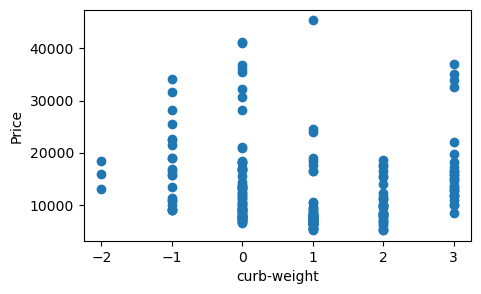

In [45]:
plt.figure(figsize=(5,3))
plt.scatter(data['symboling'],data['price'])
plt.xlabel('curb-weight')
plt.ylabel('Price')
plt.show()

In [46]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,125.64359,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,125.64359,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,125.64359,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.00000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.00000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [47]:
pd.get_dummies(data)


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm_5200,peak-rpm_5250,peak-rpm_5300,peak-rpm_5400,peak-rpm_5500,peak-rpm_5600,peak-rpm_5800,peak-rpm_5900,peak-rpm_6000,peak-rpm_6600
0,3,125.64359,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,3,125.64359,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,1,125.64359,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,2,164.00000,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,1,0,0,0,0,0
4,2,164.00000,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.00000,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,1,0,0,0,0,0,0
201,-1,95.00000,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,1,0,0,0,0,0,0,0
202,-1,95.00000,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,1,0,0,0,0,0
203,-1,95.00000,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,0,0,0,0,0


In [48]:
data=pd.get_dummies(data)
data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm_5200,peak-rpm_5250,peak-rpm_5300,peak-rpm_5400,peak-rpm_5500,peak-rpm_5600,peak-rpm_5800,peak-rpm_5900,peak-rpm_6000,peak-rpm_6600
0,3,125.64359,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,3,125.64359,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,1,125.64359,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,2,164.00000,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,1,0,0,0,0,0
4,2,164.00000,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,1,0,0,0,0,0


In [49]:
data.isna().sum().sum()

0

# Machine Learning 

In [50]:
data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm_5200,peak-rpm_5250,peak-rpm_5300,peak-rpm_5400,peak-rpm_5500,peak-rpm_5600,peak-rpm_5800,peak-rpm_5900,peak-rpm_6000,peak-rpm_6600
0,3,125.64359,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,3,125.64359,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,1,125.64359,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,2,164.00000,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,1,0,0,0,0,0
4,2,164.00000,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,1,0,0,0,0,0


In [55]:
x=data.drop(['price'],axis=1).values   #record in a row 
#print('x:',x)
y=data.loc[:,'price'].values
#print('y:',y)

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print('xtrain',x_train.shape)

xtrain (160, 154)


In [57]:
def linear_reg(a,b,x_train):     #y_pred=a1x1+a2x2+.....+b
    x_train=x_train.T    #(154,160) each row feature 
    y=a.dot(x_train)
    y=y+b
    return y

yPred=linear_reg(a,b,x_train)
yPred.shape


(160,)

In [58]:
def cost_function(y_pred,y):
    m=len(y)
    mse=(1/m)*sum((y_pred-y)**2)
    return mse

In [59]:
def aNew(aOld,bOld,alpha,y_pred,y_train,x_train):
    #a=aOld.T 
    x_train=x_train.T    #(154,160) each row feature 
    m=len(y_train)
    aN=[]
    for i in range(len(x_train)):
        x=i
        d=sum((y_train-y_pred))*-x
        N=aOld[i]-alpha*((2/m)*d)
        aN.append(N)
    return np.array(aN) 
aN=aNew(a,b,alpha,y_train,yPred,x_train)
aN.shape

(154,)

In [60]:
def bNew(aOld,bOld,alpha,y_pred,y,x):
    m=len(y)
    bN=bOld-alpha*((2/m)*sum((y-y_pred)*-1))
    return bN 

In [61]:
def gradient_descent(a,b,y_pred,y,x):
    aN=aNew(a,b,alpha,y,y_pred,x)
    bN=bNew(a,b,alpha,y,y_pred,x)
    return aN,bN

In [62]:
a=np.empty((154,))
b=np.random.randn()
mse=0
alpha=0.0000001

for i in range(9000):
    yPred=linear_reg(a,b,x_train)
    mse=cost_function(yPred,y_train)
    #print("iteration : ",i+1," Mse : ",mse)
    a,b=gradient_descent(a,b,yPred,y_train,x_train)
print("iteration : ",i+1," Mse : ",mse)    

iteration :  9000  Mse :  3.564700947165422e+44


In [63]:
print(b)


-9.856256138227213e+17


In [64]:
print(a)

[-2.26257654e+04 -9.85625614e+17 -1.97125123e+18 -2.95687684e+18
 -3.94250246e+18 -4.92812807e+18 -5.91375368e+18 -6.89937930e+18
 -7.88500491e+18 -8.87063052e+18 -9.85625614e+18 -1.08418818e+19
 -1.18275074e+19 -1.28131330e+19 -1.37987586e+19 -1.47843842e+19
 -1.57700098e+19 -1.67556354e+19 -1.77412610e+19 -1.87268867e+19
 -1.97125123e+19 -2.06981379e+19 -2.16837635e+19 -2.26693891e+19
 -2.36550147e+19 -2.46406403e+19 -2.56262660e+19 -2.66118916e+19
 -2.75975172e+19 -2.85831428e+19 -2.95687684e+19 -3.05543940e+19
 -3.15400196e+19 -3.25256453e+19 -3.35112709e+19 -3.44968965e+19
 -3.54825221e+19 -3.64681477e+19 -3.74537733e+19 -3.84393989e+19
 -3.94250246e+19 -4.04106502e+19 -4.13962758e+19 -4.23819014e+19
 -4.33675270e+19 -4.43531526e+19 -4.53387782e+19 -4.63244038e+19
 -4.73100295e+19 -4.82956551e+19 -4.92812807e+19 -5.02669063e+19
 -5.12525319e+19 -5.22381575e+19 -5.32237831e+19 -5.42094088e+19
 -5.51950344e+19 -5.61806600e+19 -5.71662856e+19 -5.81519112e+19
 -5.91375368e+19 -6.01231